In [25]:
import inception5h
import math
import os
from os import listdir
import tensorflow as tf
import utils

from image_processing import process_and_save_img
from IPython.core.display import HTML

In [26]:
# download deep dream model if it does not yet exist locally
inception5h.maybe_download()

Data has apparently already been downloaded and unpacked.


In [27]:
# load model
model = inception5h.Inception5h()

In [28]:
# create TensorFlow session
session = tf.InteractiveSession(graph=model.graph)

In [32]:
# available categories 

categories = ['streetart', 'urban', 'landscape']

category = categories[0]

# set up paths where to pick up images from
# full_path = os.path.join(os.getcwd(), category)
full_path = os.path.join(os.getcwd(),'img', category)

In [33]:
files = os.listdir(full_path)

The image that will be processed: /Users/stefan.tippelt/deep-dream-viz/src/img/streetart/streetart3.jpg


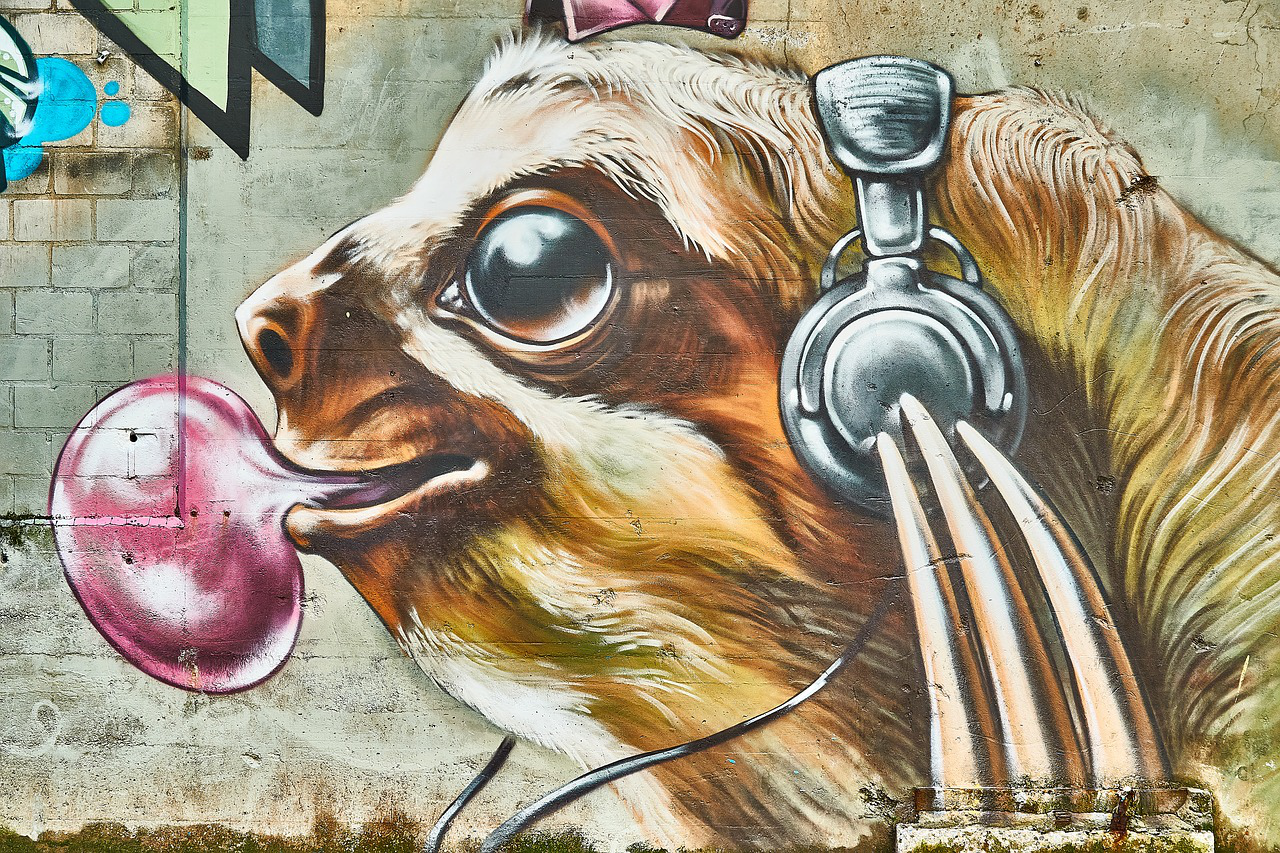

In [34]:
# reference picture you are interested in
filename = files[3]

filename_path = os.path.join(full_path, filename)


# load input image from folder
image = utils.load_image(filename=filename_path)
print('The image that will be processed:', filename_path)
utils.plot_image(image)

In [35]:
%%time
# create path where to store output images
output_path = full_path + '_output_' + os.path.splitext(filename)[0]
print('The resulting images are stored to the folder:', output_path)

# run the main function which processes the potential pieces of art and stores it to the output folder
img_dict = process_and_save_img(input_name=filename, category=category, output_path=output_path, image=image, 
                     model=model, session=session)

The resulting images are stored to the folder: /Users/stefan.tippelt/deep-dream-viz/src/img/streetart_output_streetart3
blend_number 0.0
Recursive level: 0
Processing image: Recursive level: 1
Processing image: Recursive level: 2
Processing image: Recursive level: 3
Processing image: saving image: streetart3conv2d0_00_0.jpg
blend_number 0.2
Recursive level: 0
Processing image: Recursive level: 1
Processing image: Recursive level: 2
Processing image: Recursive level: 3
Processing image: saving image: streetart3conv2d0_00_2.jpg
blend_number 0.4
Recursive level: 0
Processing image: Recursive level: 1
Processing image: Recursive level: 2
Processing image: Recursive level: 3
Processing image: saving image: streetart3conv2d0_00_4.jpg
blend_number 0.6
Recursive level: 0
Processing image: Recursive level: 1
Processing image: Recursive level: 2
Processing image: Recursive level: 3
Processing image: saving image: streetart3conv2d0_00_6.jpg
blend_number 0.0
Recursive level: 0
Processing image: Re

In [36]:
HTML("""
<style>
* {
    box-sizing: border-box;
}

body {
    margin: 0;
    font-family: Arial;
}

.header {
    text-align: center;
    padding: 32px;
}

/* Create four equal columns that floats next to each other */
.column {
    float: left;
    width: 25%;
    padding: 10px;
}

.column img {
    margin-top: 12px;
}

/* Clear floats after the columns */
.row:after {
    content: "";
    display: table;
    clear: both;
}

/* Responsive layout - makes a two column-layout instead of four columns */
@media (max-width: 800px) {
    .column {
        width: 50%;
    }
}

/* Responsive layout - makes the two columns stack on top of each other instead of next to each other */
@media (max-width: 600px) {
    .column {
        width: 100%;
    }
}
</style>
""")

In [37]:
# define output file
output_file = category + '_output_' + os.path.splitext(filename)[0] + '/'

# define list for images with different blend parameters
images0 = []
images2 = []
images4 = []
images6 = []

# get all images in directory
for image in listdir(os.path.join('img', output_file)):
    # store names of images with different blend parameters in subfolders
    blend0 = []
    blend2 = []
    blend4 = []
    blend6 = []
    
    # iterate through image dict and append to proper blend file
    for key, value in img_dict.items():
        if value['blend'] == 0.0:
            blend0.append(value['filename'])
        if value['blend'] == 0.2:
            blend2.append(value['filename'])
        if value['blend'] == 0.4:
            blend4.append(value['filename'])
        if value['blend'] == 0.6:
            blend6.append(value['filename'])

# create HTML output for the single blend parameters as separate columns
for image in blend0:
    img0 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images0.append(img0)

for image in blend2:
    img2 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images2.append(img2)

for image in blend4:
    img4 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images4.append(img4)

for image in blend6:
    img6 = '<img src="img/{output_file}{name}" style="width:100%">'.format(name=image, 
                                                                           output_file=output_file)
    images6.append(img6)

image in blend0 streetart3conv2d0_00_0.jpg
image in blend0 streetart3conv2d2_00_0.jpg
image in blend0 streetart3mixed3b_00_0.jpg
image in blend0 streetart3mixed4b_00_0.jpg
image in blend0 streetart3mixed4d_00_0.jpg
image in blend0 streetart3mixed5a_00_0.jpg


In [39]:
# create HTML and pass images
HTML("""
<div class="row"> 
  <div class="column">
    {images0}
  </div>
  <div class="column">
    {images2}
  </div>
    <div class="column">
    {images4}
  </div>
    <div class="column">
    {images6} 
  </div>
</div>
""".format(images0="\n".join(images0), 
           images2="\n".join(images2), 
           images4="\n".join(images4), 
           images6="\n".join(images6), 
           images8="\n".join(images8)))